In [1]:
import xarray as xr
import glob
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = f'/gxfs_work/geomar/smomw523/master-thesis/output_data/retention/tiefenunabhängig/'
path_tides = f'/gxfs_work/geomar/smomw523/master-thesis/output_data/retention/tiefenunabhängig/tides/'

In [3]:
import warnings
warnings.filterwarnings('ignore')

all_files = glob.glob(os.path.join(path, "2*.csv"))
all_files_tides = glob.glob(os.path.join(path_tides, "2*.csv"))
dates = pd.date_range(start='2009-01-01', end='2009-12-31', freq = '5D')

df = pd.concat((pd.read_csv(f, usecols=[1,2,3,4], index_col=2) for f in all_files), keys=dates)
df.index.names = ['start_date', 'depthdiff']
df['INALT-obs'] = np.where(df['INALT-obs'] == -1, 43, df['INALT-obs'])

df_tides = pd.concat((pd.read_csv(f, usecols=[1,2,3,4], index_col=2) for f in all_files_tides), keys=dates)
df_tides.index.names = ['start_date', 'depthdiff']
df_tides['INALT-obs'] = np.where(df_tides['INALT-obs'] == -1, 43, df_tides['INALT-obs'])

In [4]:
#bottom layer in ROMS 10-15m at seamount

df.dropna(subset=['INALT-obs'], inplace=True)
df_tides.dropna(subset=['INALT-obs'], inplace=True)

binned_df = df.groupby(['start_date', pd.cut(df.index.get_level_values('depthdiff'), bins=range(0, 1500, 15))])['INALT-obs'].mean().unstack()
binned_df_tides = df_tides.groupby(['start_date', pd.cut(df_tides.index.get_level_values('depthdiff'), bins=range(0, 1500, 15))])['INALT-obs'].mean().unstack()

depth_midpoints = [int(depth.mid) for depth in binned_df.columns]
depth_midpoints_tides = [int(depth.mid) for depth in binned_df_tides.columns]

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


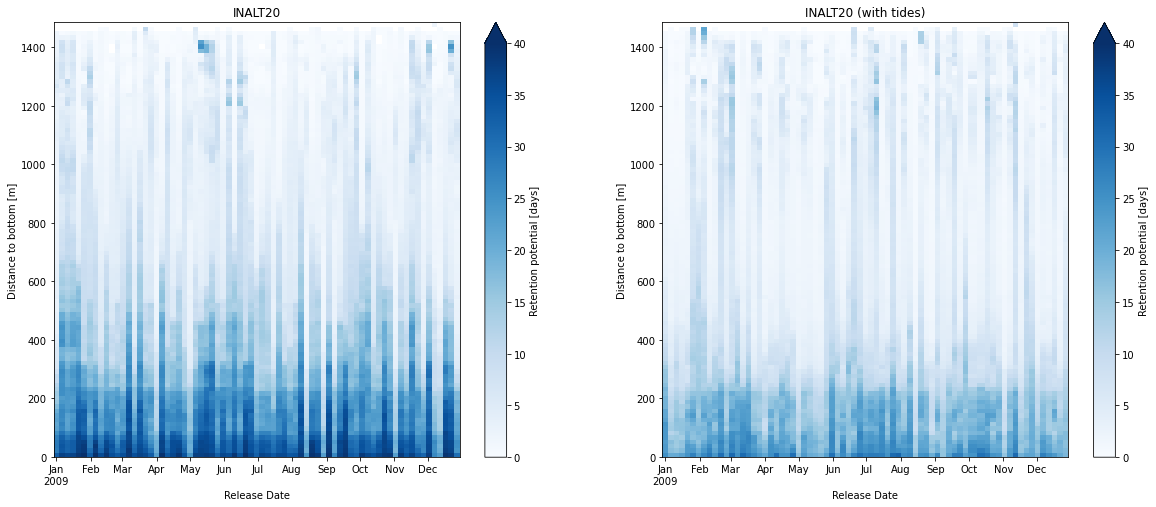

In [5]:
plt.rcParams['font.size'] = 15
plt.rcParams['font.family'] = 'Arial'

plt.figure(figsize=(20, 8))
cmap = plt.get_cmap('Blues')  # Verwenden Sie Ihre bevorzugte Farbkarte
xlabel = 'Release Date'
xticksloc = ['2009-01','2009-02','2009-03','2009-04','2009-05','2009-06','2009-07','2009-08','2009-09','2009-10','2009-11','2009-12']
xtickslab = ['Jan\n2009','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']        
#yticksloc = [0,150,300,450,600,750,900,1050,1200,1350,1500]

plt.subplot(1,2,1)
cf = plt.pcolormesh(binned_df.index, depth_midpoints, binned_df.values.T, cmap=cmap, vmin =0,vmax=40)
plt.xlabel(xlabel)
plt.xticks(xticksloc,xtickslab)
#plt.yticks(yticksloc) 
plt.ylabel('Distance to bottom [m]')
plt.title('INALT20')
plt.colorbar(cf, label='Retention potential [days]', extend='max')

plt.subplot(1,2,2)
cf = plt.pcolormesh(binned_df_tides.index, depth_midpoints_tides, binned_df_tides.values.T, cmap=cmap, vmin =0,vmax=40)
plt.xlabel(xlabel)
plt.xticks(xticksloc,xtickslab)
#plt.yticks(yticksloc) 
plt.ylabel('Distance to bottom [m]')
plt.title('INALT20 (with tides)')
plt.colorbar(cf, label='Retention potential [days]', extend='max')

plt.show()

In [10]:
((binned_df_tides.values.T-binned_df_tides.values.mean())/binned_df_tides.values.std())

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

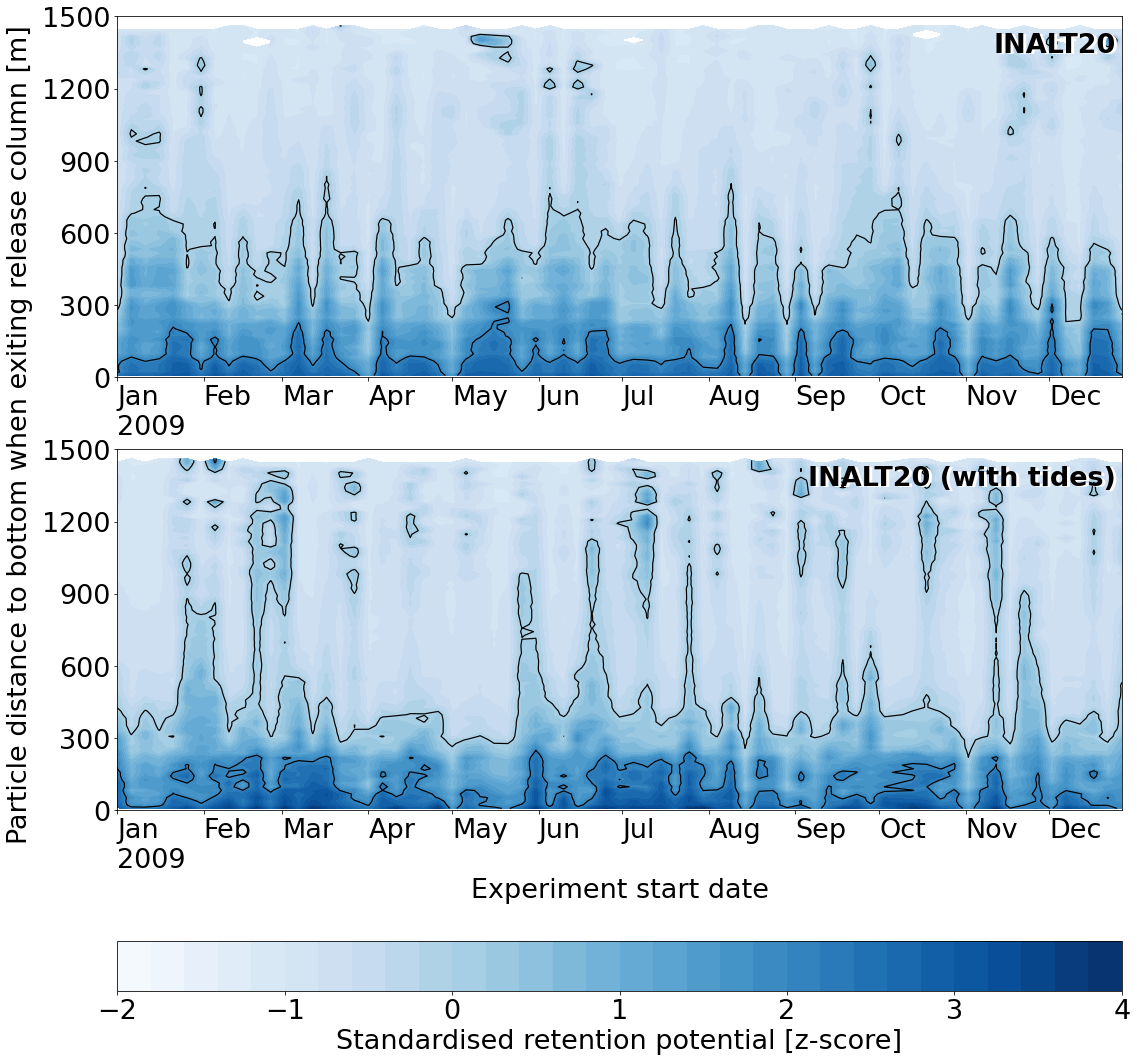

In [30]:
plt.rcParams['font.size'] = 27

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 20))

cmap = plt.get_cmap('Blues')  # Verwenden Sie Ihre bevorzugte Farbkarte
xlabel = 'Experiment start date'
xticksloc = ['2009-01','2009-02','2009-03','2009-04','2009-05','2009-06','2009-07','2009-08','2009-09','2009-10','2009-11','2009-12']
xtickslab = ['Jan\n2009', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
yticksloc = [0,300,600,900,1200,1500]

# Plot 1
cf = ax1.contourf(binned_df.index, depth_midpoints, ((binned_df.values.T-(binned_df.values[~np.isnan(binned_df.values)].mean()))/(binned_df.values[~np.isnan(binned_df.values)].std())), cmap=cmap, levels=np.linspace(-2, 4, 31))
ax1.contour(binned_df.index, depth_midpoints, ((binned_df.values.T-(binned_df.values[~np.isnan(binned_df.values)].mean()))/(binned_df.values[~np.isnan(binned_df.values)].std())), colors='black', levels=np.linspace(-2, 4, 4),linewidths=1.2)
ax1.set_xticks(xticksloc,xtickslab,horizontalalignment='left')
ax1.set_yticks(yticksloc)
ax1.text(pd.to_datetime('2009-12-26'),1345,'INALT20',horizontalalignment='right', fontweight='bold',color='white')
ax1.text(pd.to_datetime('2009-12-25'),1350,'INALT20',horizontalalignment='right', fontweight='bold')

# Plot 2
cf = ax2.contourf(binned_df_tides.index, depth_midpoints_tides, ((binned_df_tides.values.T-(binned_df_tides.values[~np.isnan(binned_df_tides.values)].mean()))/(binned_df_tides.values[~np.isnan(binned_df_tides.values)].std())), cmap=cmap, levels=np.linspace(-2, 4, 31))
ax2.contour(binned_df_tides.index, depth_midpoints_tides, ((binned_df_tides.values.T-(binned_df_tides.values[~np.isnan(binned_df_tides.values)].mean()))/(binned_df_tides.values[~np.isnan(binned_df_tides.values)].std())), colors='black', levels=np.linspace(-2, 4, 4),linewidths=1.2)
ax2.set_xticks(xticksloc,xtickslab,horizontalalignment='left')
ax2.set_yticks(yticksloc)
ax2.set_xlabel(xlabel)
ax2.text(pd.to_datetime('2009-12-26'),1345,'INALT20 (with tides)',horizontalalignment='right', fontweight='bold',color='white')
ax2.text(pd.to_datetime('2009-12-25'),1350,'INALT20 (with tides)',horizontalalignment='right', fontweight='bold')

fig.text(0.04, 0.59, 'Particle distance to bottom when exiting release column [m]', va='center', rotation='vertical', fontsize=27)

cbar = plt.colorbar(cf, ax=[ax1, ax2], orientation='horizontal', pad=0.12, ticks=np.linspace(-2, 4, 7))
cbar.set_label('Standardised retention potential [z-score]')

plt.savefig('../../output_data/rp-depths-tides.pdf', bbox_inches='tight')
